In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
d = 5.8
lamb = 1.36
s = 2.5e-1
def D(T, L):
    return d * ((L/T)**lamb / (s + (L/T)**lamb)) * T

a = 5.14e-1
b = 1.02e-9
c = 3.23e-7
def delT(T, N, D):
    return a*T*(1-b*T) - c*N*T - D

sig = 1.3e4
f = 4.12e-2
g = 2.5e-2
h = 2.02e7
p = 1e-7
def delN(T, N, D):
    return sig - f*N + ((g*T**2) / (h + T**2))*N - p*N*T

m = 2e-2
j = 3.75e-2
k = 2e7
q = 3.42e-10
r = 1.1e-7
def delL(T, N, L, D):
    return -m*L + ((j*D**2) / (k + D**2))*L - q*L*T + r*N*T


In [3]:
def ForwardImmune(T, L, N, a, b, delt):

    # Initial populations
    T_pop = [T]
    L_pop = [L]
    N_pop = [N]

    t = np.linspace(a, b, int(b-a / delt))
    for i in t[:-1]:

        # Forward Euler
        T += delt * delT(T, N, D(T, L))
        L += delt * delL(T, N, L, D(T, L))
        N += delt * delN(T, N, D(T, L))

        # Append u(t + del_t)
        T_pop.append(T)
        L_pop.append(L)
        N_pop.append(N)

    # Plot populations
    plt.semilogy(t, T_pop, label="T")
    plt.semilogy(t, L_pop, label="L")
    plt.semilogy(t, N_pop, label="N")
    # Set labels and legend
    plt.xlabel("Days")
    plt.ylabel("Population Size")
    plt.legend()
    

/opt/anaconda3/lib/python3.12/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/opt/anaconda3/lib/python3.12/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


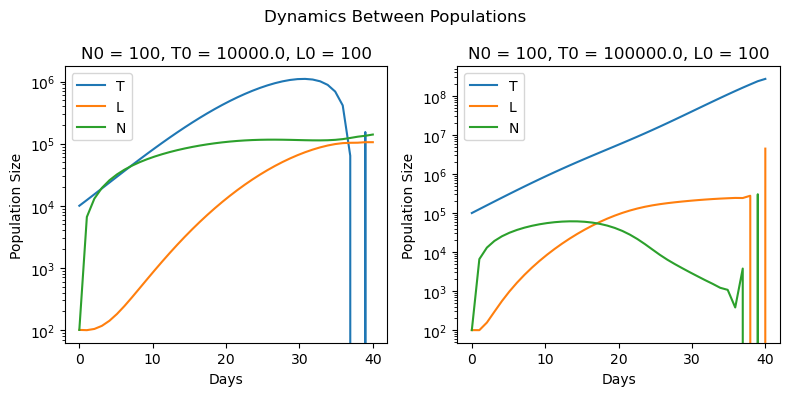

<Figure size 640x480 with 0 Axes>

In [4]:
plt.figure(figsize=(8, 4))

# Initial populations
N0 = 100
T0 = 10e3
L0 = 100
plt.subplot(1, 2, 1)
ForwardImmune(T0, L0, N0, 0, 40, .5)
plt.title(f"N0 = {N0}, T0 = {T0}, L0 = {L0}")

# Initial populations
N0 = 100
T0 = 10e4
L0 = 100
plt.subplot(1, 2, 2)
ForwardImmune(T0, L0, N0, 0, 40, .5)
# Set ttile, suptitle
plt.title(f"N0 = {N0}, T0 = {T0}, L0 = {L0}")
plt.suptitle("Dynamics Between Populations")
plt.tight_layout()
plt.show()
